In [56]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

In [57]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.utils import plot_model

In [58]:
seed = 9
np.random.seed(seed)

In [59]:
input_file = "filtereddata.csv"
test_file = "filtereddata.csv"

In [60]:
dataset = pd.read_csv(input_file).values

In [ ]:
#read training data

In [61]:
datasetTest = pd.read_csv(test_file).values

In [ ]:
#split into input (X) and output (Y) variables

In [62]:
X = dataset[:,0:8].astype("int32")
Y = dataset[:,8]
XT = datasetTest[:,0:8].astype("int32")
print("dim of X:  ",  X.ndim,   ", shape : ", X.shape)
print("dim of Y:  ",  Y.ndim,   ", shape : ", Y.shape)
print("dim of XT: ", XT.ndim,   ", shape : ", XT.shape)

dim of X:   2 , shape :  (63167, 8)
dim of Y:   1 , shape :  (63167,)
dim of XT:  2 , shape :  (63167, 8)


In [63]:
encoder = LabelEncoder()
encoder.fit(Y)
print(list(encoder.classes_))
encoded_Y = encoder.transform(Y)
print("dim of encoded_Y:  ",  encoded_Y.ndim,   ", shape : ", encoded_Y.shape)
print("encoded_Y = ", encoded_Y)

[1, 2, 3]
dim of encoded_Y:   1 , shape :  (63167,)
encoded_Y =  [0 0 0 ... 2 2 2]


In [ ]:
#convert integers to dummy variables (i.e. one hot encoded)

In [39]:
dummy_y = np_utils.to_categorical(encoded_Y)
print("dim of dummy_y:  ", dummy_y.ndim,   ", shape : ", dummy_y.shape)
print("dummy_y values: ", dummy_y)

dim of dummy_y:   2 , shape :  (63167, 3)
dummy_y values:  [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [10]:
(X_train, X_test, Y_train, Y_test) = train_test_split(X, dummy_y, test_size=0.001, random_state=seed)
# create "sequential" - feed forward model with 4 layers, each with 8,4,3 and 3 neurons, 
# with a ReLU activation function for the first 2 layers, tanh for the third layer, softmax for output - indicates a probability distribution
model = Sequential()
model.add(Dense(8, input_dim=8, init='normal', activation='relu'))
model.add(Dense(4, init='normal', activation='relu'))
model.add(Dense(3, init='normal', activation='tanh'))
model.add(Dense(3, init='normal', activation='softmax'))
print(model.summary())
# Compile model, 'adam' optimizer is the default 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 12        
Total params: 135
Trainable params: 135
Non-trainable params: 0
_________________________________________________________________
None


/Users/kalyan.subramanian/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, input_dim=8, activation="relu", kernel_initializer="normal")`
  """
/Users/kalyan.subramanian/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4, activation="relu", kernel_initializer="normal")`
  
/Users/kalyan.subramanian/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3, activation="tanh", kernel_initializer="normal")`
  import sys
/Users/kalyan.subramanian/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3, activation="softmax", kernel_initializer="normal")`
  


In [ ]:
#Fit the model

In [11]:
print(X_train.shape)
print(Y_train.shape)
print("Before calling the fit() method on model ...")
history = model.fit(X_train, Y_train, validation_split=0.3, epochs=16, batch_size=128)

(63103, 8)
(63103, 3)
Before calling the fit() method on model ...
Train on 44172 samples, validate on 18931 samples
Epoch 1/16
44172/44172 [==============================] - 1s 15us/step - loss: 0.7925 - accuracy: 0.6672 - val_loss: 0.5873 - val_accuracy: 0.7599
Epoch 2/16
44172/44172 [==============================] - 1s 11us/step - loss: 0.4528 - accuracy: 0.8051 - val_loss: 0.3568 - val_accuracy: 0.8816
Epoch 3/16
44172/44172 [==============================] - 0s 10us/step - loss: 0.3301 - accuracy: 0.8836 - val_loss: 0.2953 - val_accuracy: 0.8816
Epoch 4/16
44172/44172 [==============================] - 0s 10us/step - loss: 0.2529 - accuracy: 0.9184 - val_loss: 0.2109 - val_accuracy: 0.9396
Epoch 5/16
44172/44172 [==============================] - 0s 10us/step - loss: 0.1882 - accuracy: 0.9423 - val_loss: 0.1769 - val_accuracy: 0.9396
Epoch 6/16
44172/44172 [==============================] - 0s 10us/step - loss: 0.1676 - accuracy: 0.9423 - val_loss: 0.1657 - val_accuracy: 0.9396
E

In [ ]:
#evaluate the model

In [12]:
scores = model.evaluate(X_test, Y_test)

64/64 [==============================] - 0s 50us/step


In [13]:
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


accuracy: 90.62%


<class 'keras.callbacks.callbacks.History'>


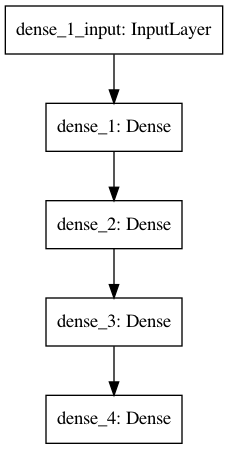

In [14]:
print(type(history))
plot_model(model, to_file='model.png')

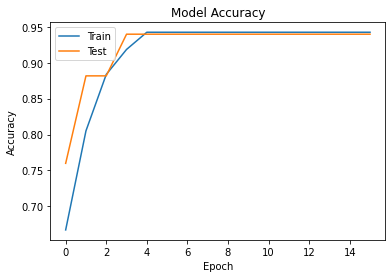

In [15]:
plt.figure(1)
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

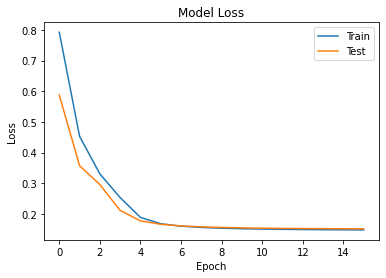

In [16]:
plt.figure(2)
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [21]:
y_pred_keras = model.predict_classes(XT)
print("y_pred_keras.ndim is  : ",  y_pred_keras.ndim)
print("Y_test.ndim is   : ",  Y_test.ndim)
print("value of y_pred_keras = ", y_pred_keras)
print("shape of y_pred_keras = ", y_pred_keras.shape)

y_pred_keras.ndim is  :  1
Y_test.ndim is   :  2
value of y_pred_keras =  [0 0 0 ... 2 2 2]
shape of y_pred_keras =  (63167,)


In [18]:
csv = open("output.csv", "w")
#"w" indicates that you're writing strings to the file

In [77]:
pd.DataFrame(y_pred_keras).to_csv("output.csv")
cm = confusion_matrix(Y, y_pred_keras, labels=[0,1,2])
print("cm   : ",  cm.ndim)
print(cm.shape)
print(cm)
from sklearn import metrics
print(metrics.classification_report(Y, y_pred_keras, labels=[0,1,2]))

cm   :  2
(3, 3)
[[    0     0     0]
 [33599     0     0]
 [    0 11088  3696]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00     33599
           2       0.20      0.25      0.22     14784

   micro avg       0.06      0.08      0.07     48383
   macro avg       0.07      0.08      0.07     48383
weighted avg       0.06      0.08      0.07     48383



/Users/kalyan.subramanian/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
csv = open("input.csv", "w")
#"w" indicates that you're writing strings to the file

In [72]:
pd.DataFrame(XT).to_csv("input.csv")